In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('https://gist.githubusercontent.com/kitmonisit/900affc23e780ac853c439b30fce5cd0/raw/e391f8d135799d687f0eb380a54366f03142a0df/50_Startups.csv')

In [11]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [19]:
X = df.iloc[:, 0].values
Y = df.iloc[:, -1].values

In [21]:
X
Y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [25]:
len(X_train), len(X_test), len(Y_train), len(Y_test)

(40, 10, 40, 10)

In [26]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
X_test

array([[ 1.54668983],
       [ 0.53270676],
       [-0.11740606],
       [-1.62445533],
       [ 1.19764452],
       [ 2.27783124],
       [ 0.52692044],
       [ 1.99455282],
       [ 0.20014618],
       [-1.63195451]])

In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
y_pred = regressor.predict(X_test)

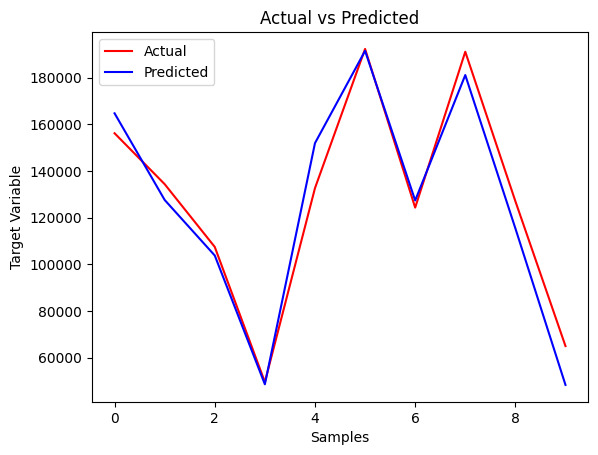

In [35]:
plt.plot(Y_test, color='red', label='Actual')
plt.plot(y_pred, color='blue', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Samples')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

### ___ Regression Metrics ___ ###

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Absolute Error: 8136.521344077491
Mean Squared Error: 102733785.50387256
Root Mean Squared Error: 10135.767632689325
R^2 Score: 0.9474181975282239


In [42]:
n = X_test.shape[0]
k = X_test.shape[1]

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print("Adjusted R^2 Score:", adjusted_r2)

Adjusted R^2 Score: 0.9408454722192519
